In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('auto-mpg.data', na_values='?', delim_whitespace=True, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name'])

<AxesSubplot: >

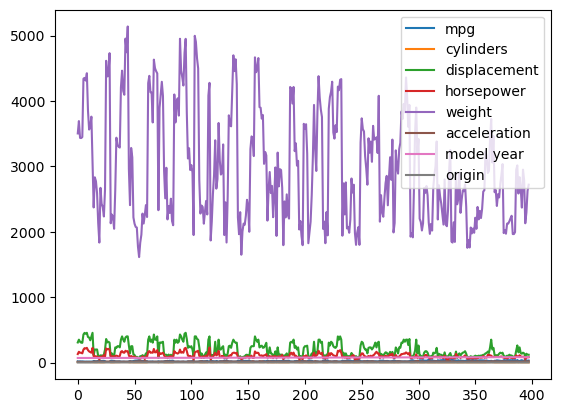

In [7]:
data.plot()

<AxesSubplot: ylabel='Frequency'>

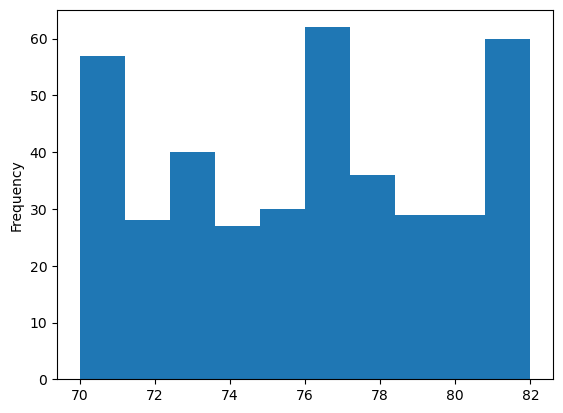

In [8]:
data['model year'].plot.hist()

In [9]:
data.origin.value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

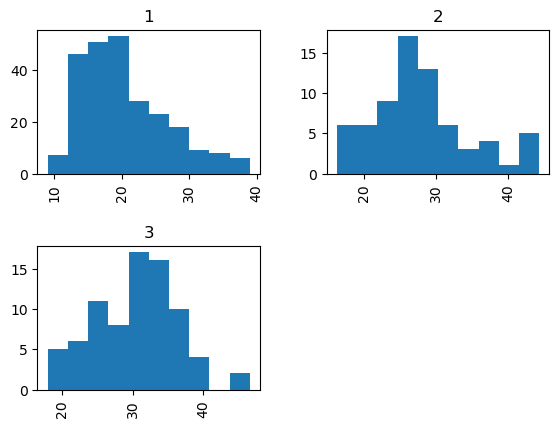

In [37]:
axs = data.hist(column='mpg', by='origin')

No origin specifications were given or could be found for this data set, so we will assume that 1 maps to 'US', 2 maps to 'Europe', 3 maps to 'Japan'.

[Text(0.5, 1.0, 'Japan'), (0.0, 55.0)]

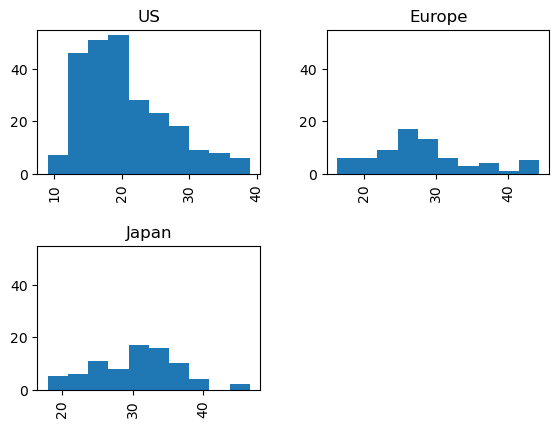

In [49]:
axs = data.hist(column='mpg', by='origin')
axs[0,0].set(title='US', ylim=[0, 55])
axs[0,1].set(title='Europe', ylim=[0, 55])
axs[1,0].set(title='Japan', ylim=[0, 55])

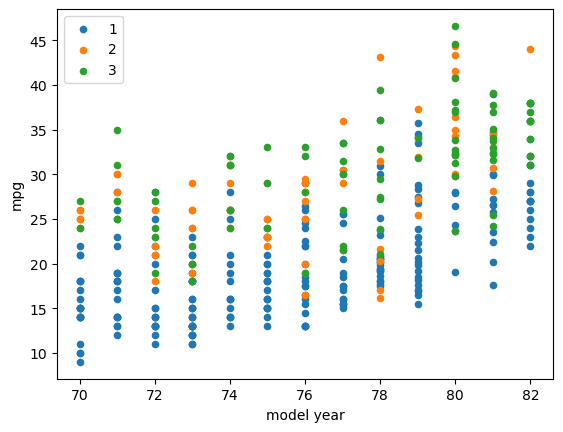

In [20]:
colors = {1: 'tab:blue', 2: 'tab:orange', 3: 'tab:green'}
fig, ax = plt.subplots()
for key, group in data.groupby(by='origin'):
    group.plot.scatter('model year', 'mpg', c=colors[key], label=key, ax=ax)

In [18]:
import seaborn as sns

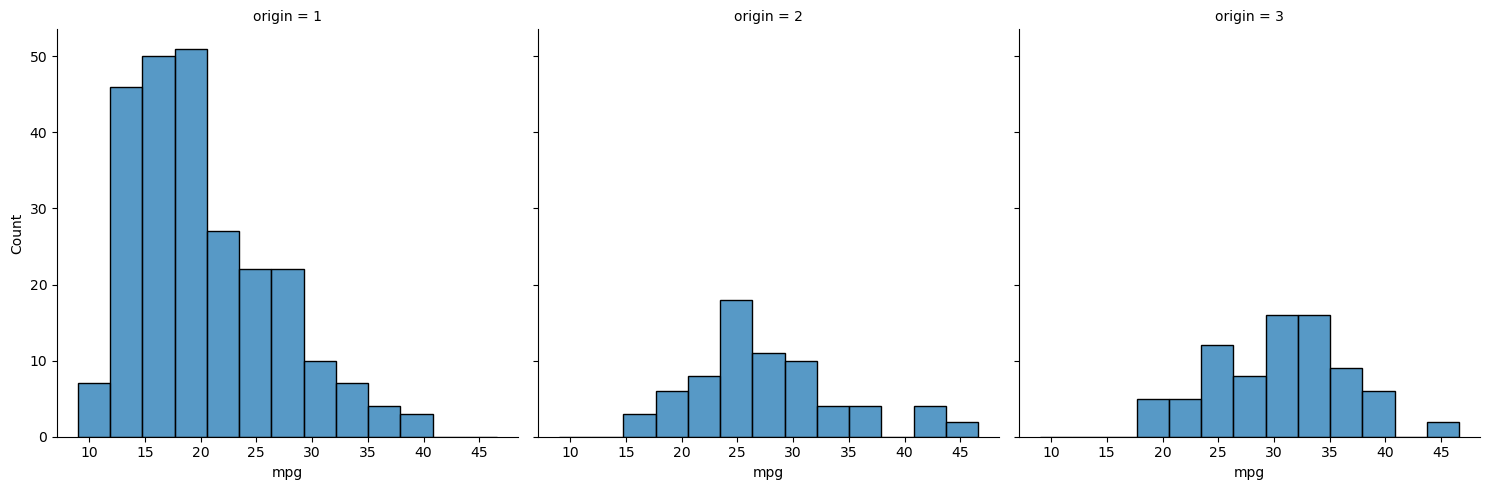

In [22]:
sns.displot(x='mpg', col='origin', data=data)

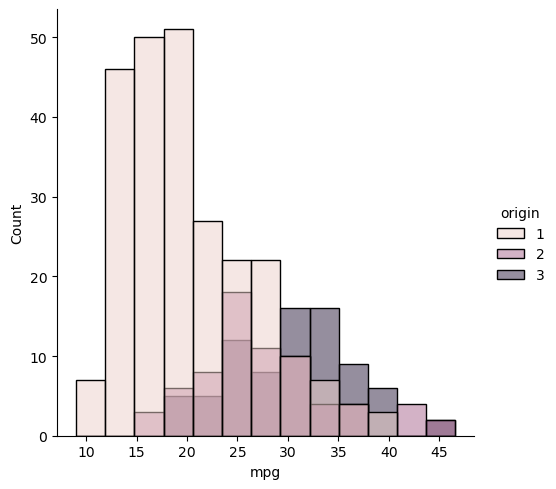

In [23]:
sns.displot(x='mpg', hue='origin', data=data)

/opt/homebrew/Caskroom/miniforge/base/envs/ensf-ml/lib/python3.10/site-packages/seaborn/distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


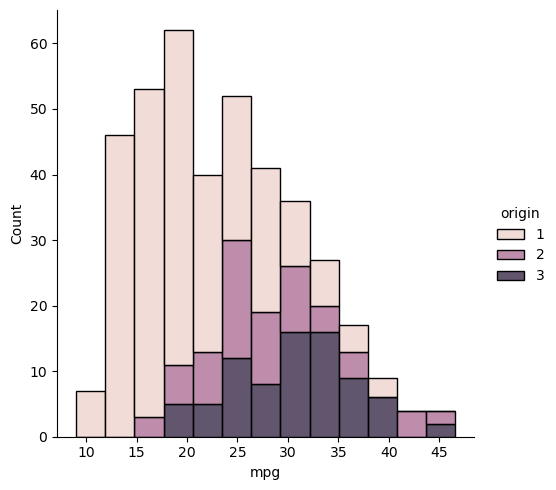

In [25]:
sns.displot(x='mpg', hue='origin', data=data, multiple='stack')

<AxesSubplot: xlabel='origin', ylabel='mpg'>

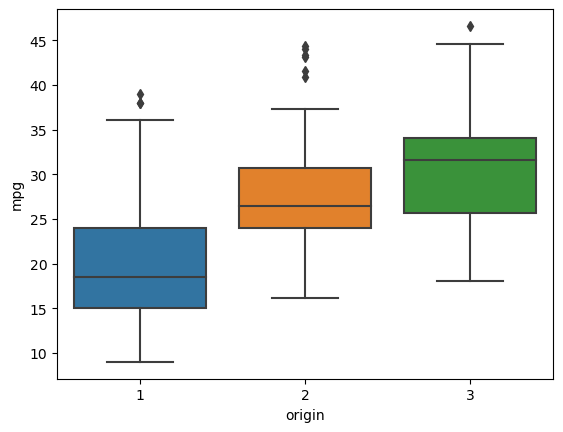

In [27]:
sns.boxplot(x='origin', y='mpg', data=data)

No origin specifications were given or could be found for this data set, so we will assume that 1 maps to 'US', 2 maps to 'Europe', 3 maps to 'Japan'.

In [28]:
data['origin_str'] = data['origin'].replace([1, 2, 3], ['US', 'Europe', 'Japan'])

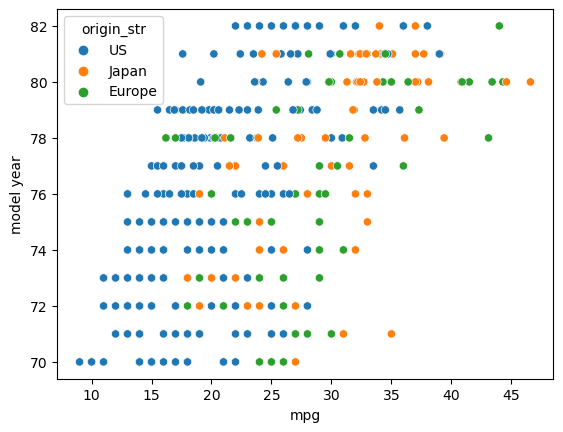

In [29]:
ax = sns.scatterplot(x='mpg', y='model year', data=data, hue='origin_str')

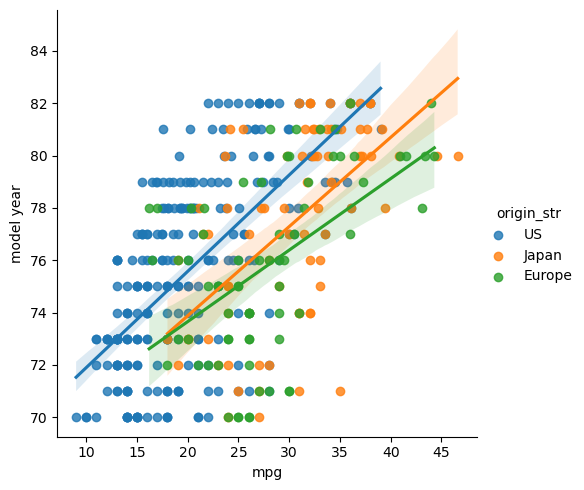

In [30]:
ax = sns.lmplot(x='mpg', y='model year', data=data, hue='origin_str')

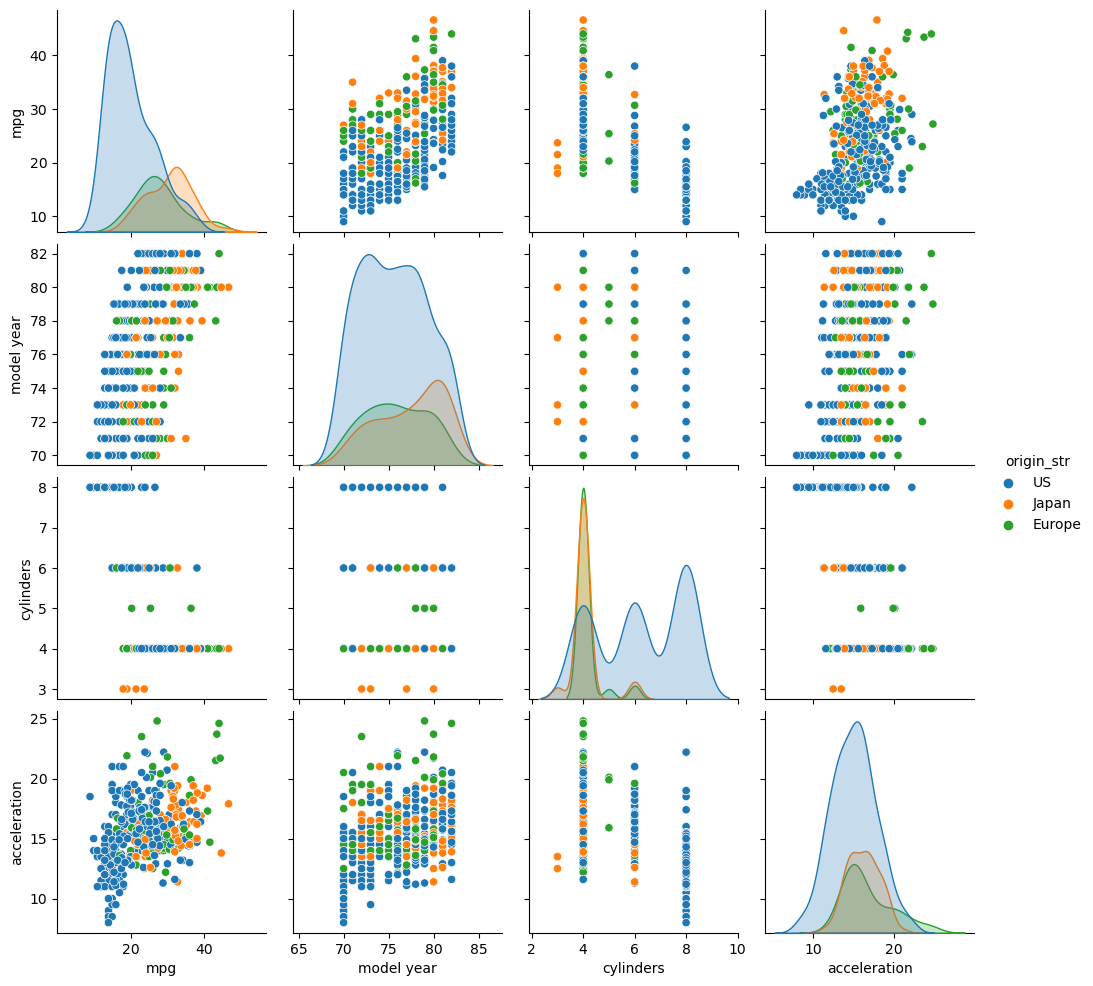

In [31]:
sns.pairplot(data, vars=['mpg', 'model year', 'cylinders', 'acceleration'], hue='origin_str')

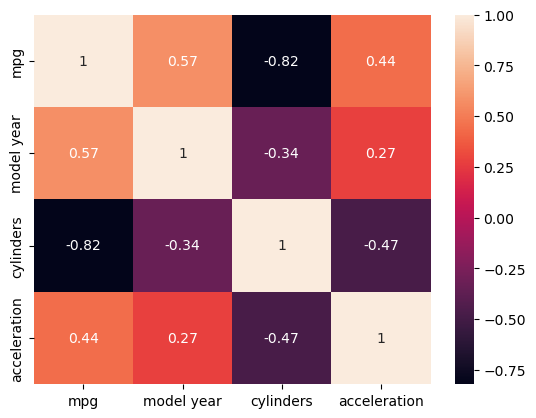

In [32]:
g = sns.heatmap(data[['mpg', 'model year', 'cylinders', 'acceleration']].corr(method='spearman'), annot=True)